***LAB 2 : LINEAR REGRESSION AND CLASSIFICATION***

In [0]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 1.3MB/s 
     |████████████████████████████████| 450kB 34.8MB/s 
     |████████████████████████████████| 3.8MB 33.2MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [0]:
tf.__version__

'2.0.0'

In [0]:
%matplotlib inline

In [0]:
from sklearn import datasets,preprocessing,model_selection

In [0]:
boston = datasets.load_boston()

In [0]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [0]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [0]:
X = boston['data']
y = boston['target']

In [0]:
X.shape

(506, 13)

In [0]:
X[0:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [0]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [0]:
y.shape

(506,)

In [0]:
y = y.reshape(-1,1)  ### always do this to ensure you dont have dimensionality problems in tensorflow

In [0]:
y.shape

(506, 1)

In [0]:
y[0:5]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2]])

In [0]:
## Always normalize the data before starting in tensorflow it will have a effect in complex models if you dont do so

X = preprocessing.scale(X)
y = preprocessing.scale(y)

In [0]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y)

In [0]:
len(X_train)

379

In [0]:
len(X_test)

127

In [0]:
y[0:5]

array([[ 0.15968566],
       [-0.10152429],
       [ 1.32424667],
       [ 1.18275795],
       [ 1.48750288]])

In [0]:
w = tf.Variable(tf.random.normal(shape=(13,1),stddev=0.01,dtype=tf.float64))
b = tf.Variable(0.0,dtype=tf.float64)

In [0]:
def linearM(x):
  return tf.matmul(x,w) + b                             ### w * x is a element-wise operation and  matmul is direct multiplication of matrices

In [0]:
linearM(X_train[0:3])

InvalidArgumentError: ignored

In [0]:
### after changing dtype 
linearM(X_train[0:3])

<tf.Tensor: id=71, shape=(3, 1), dtype=float64, numpy=
array([[-0.00601815],
       [-0.01266556],
       [-0.02378723]])>

In [0]:
def squared_loss(ytrue,ypredicted):
  return tf.reduce_mean((ytrue - ypredicted)**2.0)

In [0]:
squared_loss(y_train,linearM(X_train))

<tf.Tensor: id=82, shape=(), dtype=float64, numpy=0.9788782893681472>

In [0]:
for i in range(1000):
  with tf.GradientTape() as tape:
    ypredicted = linearM(X_train)
    loss = squared_loss(y_train,ypredicted) 
  
  g = tape.gradient(loss,[w,b])
  w.assign_sub(0.01 * g[0])    # w =  w - \eta * gradient of loss w.r.t w 
  b.assign_sub(0.01 * g[1])


In [0]:
w

<tf.Variable 'Variable:0' shape=(13, 1) dtype=float64, numpy=
array([[-0.11193109],
       [ 0.07118923],
       [-0.00161474],
       [ 0.11042498],
       [-0.21383516],
       [ 0.29340811],
       [-0.00116369],
       [-0.29405689],
       [ 0.19531334],
       [-0.11395842],
       [-0.23098844],
       [ 0.07598138],
       [-0.40134566]])>

In [0]:
squared_loss(y_train,linearM(X_train))

<tf.Tensor: id=72106, shape=(), dtype=float64, numpy=0.26146474911750717>

In [0]:
squared_loss(y_test,linearM(X_test))

<tf.Tensor: id=72117, shape=(), dtype=float64, numpy=0.2649225844340713>

In [0]:
XX = tf.matmul(X.transpose(), X)
Xy = tf.matmul(X.transpose(), y)

In [0]:
wopt = tf.matmul(tf.linalg.inv(XX),Xy)
wopt

<tf.Tensor: id=72128, shape=(13, 1), dtype=float64, numpy=
array([[-0.10101708],
       [ 0.1177152 ],
       [ 0.0153352 ],
       [ 0.07419883],
       [-0.22384803],
       [ 0.29105647],
       [ 0.00211864],
       [-0.33783635],
       [ 0.28974905],
       [-0.22603168],
       [-0.22427123],
       [ 0.09243223],
       [-0.40744693]])>

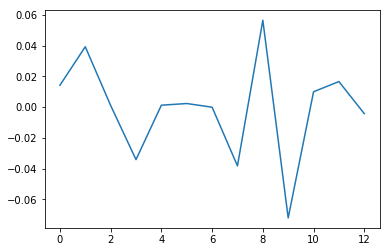

In [0]:
import matplotlib.pyplot as plt
plt.plot(wopt - w)
#plt.plot([0,12],[-1.0,1.0])
#plt.plot([0,12],[-1.5,1.5])

**CLASSIFICATION**

In [0]:
bcancer  = datasets.load_breast_cancer()

In [0]:
bcancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
X = bcancer['data']
y = bcancer['target']

In [0]:
X.shape

(569, 30)

In [0]:
X[0:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [0]:
y.shape

(569, 1)

In [0]:
y[0:20]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [0]:
y  = y.reshape(-1,1).astype(np.int32)
y.shape

(569, 1)

In [0]:
y.dtype

dtype('int32')

In [0]:
Xtrain,Xtest,ytrain,ytest = model_selection.train_test_split(X,y, stratify = y ) # split the data equally into both train and test 

In [0]:
def model_init(n_features):
  w = tf.Variable(tf.random.normal(shape=(n_features,1), stddev=0.01, dtype=tf.float64))
  b = tf.Variable(0.0, dtype=tf.float64)
  return w,b

In [0]:
w ,b  = model_init(X.shape[1])

In [0]:
b

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.002756394765486635>

In [0]:
w

<tf.Variable 'Variable:0' shape=(30, 1) dtype=float64, numpy=
array([[-4.29487323e-02],
       [-5.42950428e-02],
       [-3.66810389e-01],
       [-3.28050307e+00],
       [ 5.30587401e-04],
       [-6.96618287e-03],
       [-1.92742568e-02],
       [ 8.79919911e-03],
       [-8.97410531e-03],
       [ 3.27143584e-03],
       [-2.03639562e-02],
       [ 3.98770961e-03],
       [-3.19385210e-03],
       [-2.69671532e-01],
       [ 1.29789277e-02],
       [-2.04679863e-03],
       [ 5.79946375e-03],
       [ 2.31198166e-02],
       [ 1.45209001e-03],
       [ 1.34638631e-02],
       [-7.30719579e-02],
       [-8.61566785e-02],
       [-4.43112755e-01],
       [-4.86875167e+00],
       [ 6.16714332e-03],
       [-1.79289246e-03],
       [-2.08333193e-02],
       [-7.25568237e-03],
       [ 6.98408499e-03],
       [ 8.30162557e-03]])>

In [0]:
logR  = lambda x : tf.sigmoid(linearM(x))

In [0]:
from tensorflow.keras import losses ,optimizers, metrics

In [0]:
loss = losses.BinaryCrossentropy()

In [0]:
optimize = optimizers.SGD(learning_rate=0.01)

In [0]:
accuracy_score  = metrics.BinaryAccuracy()

In [0]:
ypredicted = logR(Xtrain)
ypredicted[0:10]

<tf.Tensor: id=72598, shape=(10, 1), dtype=float64, numpy=
array([[0.96073502],
       [0.99443522],
       [0.88437246],
       [0.91373558],
       [0.97809703],
       [0.81797027],
       [0.99627854],
       [0.86763715],
       [0.99612486],
       [0.99960234]])>

In [0]:
accuracy_score = metrics.BinaryAccuracy()
accuracy_score.update_state(ytrain,ypredicted)
accuracy_score.result()

<tf.Tensor: id=72351, shape=(), dtype=float32, numpy=0.6103286>

In [0]:
accuracy_score(Xtest,ytest)

<tf.Tensor: id=72263, shape=(), dtype=float32, numpy=0.456942>

In [0]:
accuracy_score = metrics.BinaryAccuracy()
accuracy_score.update_state(ypredicted,ytrain)
accuracy_score.result()

<tf.Tensor: id=72382, shape=(), dtype=float32, numpy=0.0>

In [0]:
all_accuracies = []

for i in range(1000):
  with tf.GradientTape() as tape:
    ypredicted = logR(Xtrain)
    l = loss(ytrain,ypredicted) 
  
  g = tape.gradient(l,[w,b])
  #w.assign_sub(0.01 * g[0])    # w =  w - \eta * gradient of loss w.r.t w 
  #b.assign_sub(0.01 * g[1])
  optimize.apply_gradients([(g[0],w),(g[1],b)])

  accuracy_score = metrics.BinaryAccuracy()
  accuracy_score.update_state(ytrain,ypredicted)
  all_accuracies.append(accuracy_score.result())


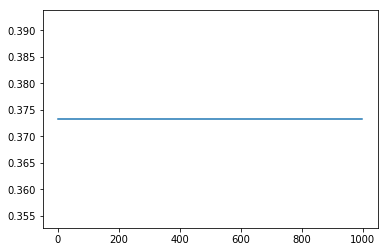

In [0]:
import matplotlib.pyplot as plt
plt.plot(all_accuracies)